# Import Needed Packages

In [501]:
from flask import Flask,  jsonify,request
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel 
from sklearn.metrics import mean_squared_error
from math import sqrt
import pandas as pd
import string

# upload data

In [502]:
original_data_loaded = pd.read_csv('jobs_skills.csv') #original data loaded
original_data_loaded.columns = ['id','title', 'jobFunction', 'industry', 'skills'] # cloumns we have

In [503]:
enhanced_data=pd.read_csv('jobs_skills.csv') #enhanced data will be saved here
enhanced_data.columns = ['id','title', 'jobFunction', 'industry', 'skills'] # cloumns we have

#enhanced_data.sample(10)# discover data we have

# Clean Data

In [504]:
#removing special characters
enhanced_data['title']=enhanced_data['title'].str.encode('ascii', 'ignore').str.decode('ascii')
enhanced_data['jobFunction']=enhanced_data['jobFunction'].str.encode('ascii', 'ignore').str.decode('ascii')
enhanced_data['industry']=enhanced_data['industry'].str.encode('ascii', 'ignore').str.decode('ascii')
enhanced_data['skills']=enhanced_data['skills'].str.encode('ascii', 'ignore').str.decode('ascii')

In [505]:
#Dropping all rows that have missing value or 'nan' values

'''-------------------set Data Loaded in DataFrams--------------------'''
# old_original datafram that has the values without any enhancements
old_original_df = pd.DataFrame(original_data_loaded)

# original datafram that has the values without any enhancements
original_df = pd.DataFrame(original_data_loaded)

# old_enhanced datafram that has the values with enhancements
old_enhanced_df = pd.DataFrame(enhanced_data)

# enhanced datafram that has the values with enhancements
enhanced_df = pd.DataFrame(enhanced_data)

# enhanced datafram that has the values with enhancements
play_df = pd.DataFrame(enhanced_data)

In [506]:
'''-----------------Get rows that have 'nan' values-------------------'''
# detect all the rows that contain 'nan' value from the enhanced enhanced_df
indexNames = enhanced_data[ (enhanced_data['title'] == "nan") | (enhanced_data['jobFunction'] == "['nan']") | (enhanced_data['industry'] == "['nan']")|(enhanced_data['skills'] == "['nan']") ].index

In [507]:
'''-----------------Drop Missing Values in Data Fram------------------'''
# drop all rows that has missing values from the data fram original_df
original_data_loaded.dropna(axis=0, how='any',inplace=False)

# drop all rows that has missing values from the data fram enhanced_df
enhanced_data.dropna(axis=0, how='any',inplace=False)

# drop all rows that has missing values from the data fram enhanced_df
#play_df.dropna(axis=0, how='any',inplace=False)

,id,title,jobFunction,industry,skills
0,5da0edb0e43fd1a7ab66b833,Property Consultant,['Sales/Retail'],['Real Estate/Property Management'],"['Sales', 'Retail', 'Real Estate', 'Sales Targ..."
1,5da0edb0e43fd1a7ab66b834,Sales Representative - Real Estate,"['Customer Service/Support', 'Sales/Retail']",['Real Estate/Property Management'],"['Sales', 'Real Estate', 'Sales Target', 'Cust..."
2,5da0edb1e43fd1a7ab66b835,Receptionist,['Administration'],['Real Estate/Property Management'],"['Admin Work', 'Office Management', 'Administr..."
3,5da0edafe43fd1a7ab66b831,Senior Property Consultant,['Sales/Retail'],['Real Estate/Property Management'],"['Sales', 'Real Estate', 'Sales Target', 'Comp..."
4,5da0edaee43fd1a7ab66b82f,Senior SEO Specialist,"['Marketing/PR/Advertising', 'Media/Journalism...","['Real Estate/Property Management', 'Marketing...","['Marketing Campaigns', 'E-marketing', 'Digita..."
...,...,...,...,...,...
99995,5da1a8f7e43fd1a7ab683ecd,"Applications Unlimited Sales Representative, L...","['IT/Software Development', 'Sales/Retail']","['Information Technology Services', 'Computer ...","['Peoplesoft', 'Sales', 'Computer Science', 'O..."
99996,5da1a8f8e43fd1a7ab683ece,Senior NetSuite Solution Engineer with Arabic,"['IT/Software Development', 'Engineering - Tel...","['Information Technology Services', 'Computer ...","['Computer Science', 'SaaS', 'ERP', 'Telecommu..."
99997,5da1a8f9e43fd1a7ab683ed1,Sales Representative- Alexandria,['Sales/Retail'],"['Education', 'Business Services - Other', 'Tr...","['Customer Service', 'Customer Care', 'Sales S..."
99998,5da1a8fae43fd1a7ab683ed2,English Instructor - 6th Of October (Part Time),"['Training/Instructor', 'Education/Teaching']",['Education'],"['Translation', 'Linguistics', 'IQP', 'Educati..."


In [508]:
'''-------------Delete Rows that contains 'nan' values----------------'''
# delete all rows for which column 'title','jobFunction','industry' has value'nan' from the original_df
original_data_loaded.drop(indexNames , inplace=True)

# delete all rows for which column 'title','jobFunction','industry' has value'nan' from the enhanced_df
enhanced_data.drop(indexNames , inplace=True)

# delete all rows for which column 'title','jobFunction','industry' has value'nan' from the enhanced_df
#play_df.drop(indexNames , inplace=True)

In [509]:
'''------------------Reset Indexies in Data Fram----------------------'''
#reset the index of the original_df
original_data_loaded=original_data_loaded.reset_index(drop=True)

#reset the index of the enhanced_df
enhanced_data=enhanced_data.reset_index(drop=True)


In [510]:
ps = PorterStemmer()
lemma = WordNetLemmatizer()
# excluding 'it' from the stopwords as it has meaning in the jobs the file have like 'IT/Software'
stop= set(stopwords.words('english')) - set(['it'])

In [511]:
#tokenization will done here too
#lower case all letters
enhanced_data['title'] = enhanced_data['title'].str.lower().str.replace(r'[^\w\s]+', ' ').str.split()
enhanced_data['jobFunction'] = enhanced_data['jobFunction'].str.lower().str.replace(r'[^\w\s]+', ' ').str.split()
enhanced_data['industry'] = enhanced_data['industry'].str.lower().str.replace(r'[^\w\s]+', ' ').str.split()
enhanced_data['skills'] = enhanced_data['skills'].str.lower().str.replace(r'[^\w\s]+', ' ').str.split()

In [512]:
#removing stop words
enhanced_data['title'] = enhanced_data['title'].apply(lambda x: [item for item in x if item not in stop])
enhanced_data['jobFunction'] = enhanced_data['jobFunction'].apply(lambda x: [item for item in x if item not in stop])
enhanced_data['industry'] = enhanced_data['industry'].apply(lambda x: [item for item in x if item not in stop])
enhanced_data['skills'] = enhanced_data['skills'].apply(lambda x: [item for item in x if item not in stop])

In [513]:
#lemmatization , return the base or dictionary from the words , which is know as lema
enhanced_data['title']= enhanced_data['title'].apply(lambda x : [lemma.lemmatize(y) for y in x])
enhanced_data['jobFunction']= enhanced_data['jobFunction'].apply(lambda x : [lemma.lemmatize(y) for y in x])
enhanced_data['industry']= enhanced_data['industry'].apply(lambda x : [lemma.lemmatize(y) for y in x])
enhanced_data['skills']= enhanced_data['skills'].apply(lambda x : [lemma.lemmatize(y) for y in x])

#Stemming , return the roots of the words and replacing the suffix, which is know as stem
#enhanced_data['title']= enhanced_data['title'].apply(lambda x : [ps.stem(y) for y in x])
#enhanced_data['jobFunction']= enhanced_data['jobFunction'].apply(lambda x : [ps.stem(y) for y in x])
#enhanced_data['industry']= enhanced_data['industry'].apply(lambda x : [ps.stem(y) for y in x])
#enhanced_data['skills']= enhanced_data['skills'].apply(lambda x : [ps.stem(y) for y in x])

In [514]:
enhanced_data.head(1)

,id,title,jobFunction,industry,skills
0,5da0edb0e43fd1a7ab66b833,"[property, consultant]","[sale, retail]","[real, estate, property, management]","[sale, retail, real, estate, sale, target, ind..."


In [515]:
c=0
for item in enhanced_data['title']:
    s=""
    for i in item:
        if (i != item[-1]):
            s=s+str(i)+" "
        else:
            s=s+str(i)
            
    enhanced_data['title'][c]=s
    c=c+1

In [516]:
c=0
for item in enhanced_data['jobFunction']:
    s=""
    for i in item:
        if (i != item[-1]):
            s=s+str(i)+" "
        else:
            s=s+str(i)
            
    enhanced_data['jobFunction'][c]=s
    c=c+1

In [517]:
c=0
for item in enhanced_data['industry']:
    s=""
    for i in item:
        if (i != item[-1]):
            s=s+str(i)+" "
        else:
            s=s+str(i)
            
    enhanced_data['industry'][c]=s
    c=c+1

In [518]:
c=0
for item in enhanced_data['skills']:
    s=""
    for i in item:
        if (i != item[-1]):
            s=s+str(i)+" "
        else:
            s=s+str(i)
            
    enhanced_data['skills'][c]=s
    c=c+1

In [519]:
enhanced_data

,id,title,jobFunction,industry,skills
0,5da0edb0e43fd1a7ab66b833,property consultant,sale retail,real estate property management,saleretail real estate saletarget indoor sales...
1,5da0edb0e43fd1a7ab66b834,sale representative real estate,customer service support sale retail,real estate property management,sale real estate sale target customer service ...
2,5da0edb1e43fd1a7ab66b835,receptionist,administration,real estate property management,admin work officemanagement administration adm...
3,5da0edafe43fd1a7ab66b831,senior property consultant,sale retail,real estate property management,sale real estate sale target computer skill co...
4,5da0edaee43fd1a7ab66b82f,senior seo specialist,marketing pr advertising medium journalism pub...,real estate property management marketing adve...,marketing campaign e marketing digital marketi...
...,...,...,...,...,...
99510,5da1a8f7e43fd1a7ab683ecd,application unlimited sale representative levant,it software development sale retail,information technology service computer software,peoplesoft sale computer science outdoor sale ...
99511,5da1a8f8e43fd1a7ab683ece,senior netsuite solution engineer arabic,it software development engineering telecom te...,information technology service computer software,computer science saas erp telecommunication in...
99512,5da1a8f9e43fd1a7ab683ed1,sale representative alexandria,sale retail,education business service training coaching,customer service customer care saleskill sale
99513,5da1a8fae43fd1a7ab683ed2,english instructor 6th october part time,training instructor education teaching,education,translation linguistics iqp education training...


# Save Enhanced data in CSV file

In [520]:
# save the enhanced_data in enhanced_data.csv file,so we don't have to reclean the data each time we want to use it again 
enhanced_data.to_csv('enhanced_data_new.csv')
#upload enhanced_data.csv
#enhanced_data = pd.read_csv('enhanced_data.csv')

In [521]:
enhanced_data['title'][0]

'property consultant'

In [522]:
new_dataframe=enhanced_data[['title','jobFunction','industry','skills']]

In [523]:
new_dataframe

,title,jobFunction,industry,skills
0,property consultant,sale retail,real estate property management,saleretail real estate saletarget indoor sales...
1,sale representative real estate,customer service support sale retail,real estate property management,sale real estate sale target customer service ...
2,receptionist,administration,real estate property management,admin work officemanagement administration adm...
3,senior property consultant,sale retail,real estate property management,sale real estate sale target computer skill co...
4,senior seo specialist,marketing pr advertising medium journalism pub...,real estate property management marketing adve...,marketing campaign e marketing digital marketi...
...,...,...,...,...
99510,application unlimited sale representative levant,it software development sale retail,information technology service computer software,peoplesoft sale computer science outdoor sale ...
99511,senior netsuite solution engineer arabic,it software development engineering telecom te...,information technology service computer software,computer science saas erp telecommunication in...
99512,sale representative alexandria,sale retail,education business service training coaching,customer service customer care saleskill sale
99513,english instructor 6th october part time,training instructor education teaching,education,translation linguistics iqp education training...


#### Now we have our Data Loaded Tokenized, Stemmed, Lemmatizied, Lowercased, no Special Characters no Missing Values, no 'nan' Values

# Now we are ready to import our clean data  into mongodb

In [524]:
#!pip install pymongo==3.4.0

In [525]:
import pymongo

In [526]:
# importing pymongo
from pymongo import MongoClient

# establing connection
try:
    client = MongoClient()
    print("Connected successfully!!!")
except:
    print("Could not connect to MongoDB")

Connected successfully!!!


In [527]:
# Creating new database with name Mydb
database = client.Mydb
# Creating new collection with name skills_coll in Mydb
collection = database.skills_coll

In [528]:
# Importing the dataset in the collection
collection.insert_many(enhanced_data.to_dict('records'))

In [529]:
 # Searching for the title 'property consultant' before indexing
start_time = time.time()
result = pd.DataFrame(list(collection.find({"title": "property consultant"})))
end_time = time.time()
search_time_before_indexing = end_time - start_time
print ( 'Search Time before Indexing in ms: ', search_time_before_indexing * 1000)

Search Time before Indexing in ms:  6186.256647109985


In [530]:
# Printing the number of search results
results_num = collection.find({"title": "property consultant"}).count() 
print('Number of results: ', results_num)

G:\AnacondaSetup\envs\New_Env\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  


Number of results:  1974


In [531]:
# Printing the first 5 results
print(result.head(5))

                        _id                title   jobFunction  \
0  5e92703c9846fa4d16a195e8  property consultant  sales retail   
1  5e92703c9846fa4d16a195ed  property consultant  sales retail   
2  5e92703c9846fa4d16a19636  property consultant  sales retail   
3  5e92703c9846fa4d16a1963d  property consultant  sales retail   
4  5e92703c9846fa4d16a1965f  property consultant  sales retail   

                          industry  \
0  real estate property management   
1  real estate property management   
2  real estate property management   
3  real estate property management   
4  real estate property management   

                                              skills   id  
0  sales retail real estate sales target indoor s...  NaN  
1  customer support sales property real estate cu...  NaN  
2  sales commercial projects sales target communi...  NaN  
3  sales direct sales property sales real estate ...  NaN  
4  customer support sales property real estate sa...  NaN  


In [532]:
# Trying to search with only part of the title
results_num2 = collection.find({"title" : "consultant"}).count()
print('Number of results: ', results_num2)

G:\AnacondaSetup\envs\New_Env\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  


Number of results:  0


In [533]:
# Trying to search with only part of the title
results_num2 = collection.find({"title" : "property"}).count()
print('Number of results: ', results_num2)

G:\AnacondaSetup\envs\New_Env\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  


Number of results:  0


#### Indexing the Collection

##### Indexes improve the speed of search operations in database because instead of searching the whole document, the search is performed on the indexes that holds only few fields. 

##### Now, let’s say that we want to run a query to find all the details of any employees who are named ‘Alex’?

##### Once we run a query to achieve the above result, what exactly goes on behind the scenes is, to find employees who are named Alex. The database would literally have to look at every single row in the Employee table to see if the Employee_Name for that row is ‘Alex’. So, every row up until the last row must be searched – which means thousands of rows in this scenario will have to be examined by the database to find the rows with the name ‘Alex’.

##### It’s almost like looking through the entire table with the human eye – this process is very slow and not easy, that is why indexes can help a great deal.

##### The whole point of having an index is to speed up search queries by essentially cutting down the number of records/rows in a table that needs to be examined.

##### An index is a data structure (most commonly a B- tree) that stores the values for a specific column in a table. An index is created on a column of a table. So, the key points to remember that, an index consists of column values from one table, and that, those values are stored in a data structure.

##### Here is the pictorial presentation of an index table.

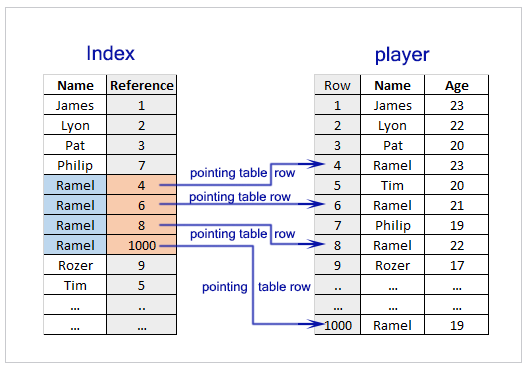

##### Here in the above example, suppose we have a table 'player' of two columns - 'name' and 'age' and we have shown the location of rows by 'row' column, but point to be noted that 'row' is not a created column in the table.

##### On the left, each index entry contains the index key (Name). Each entry also includes a reference (which points) to the rows of the table player, which share that particular value and from which we can retrieve the required information.

##### If we want to see those rows which contain the name 'Ramel', the pointer will point to the table player in location 4,6,8 and 1000 which is referring from the index table.

In [534]:
 # Indexing the collection 
collection.create_index([("title", pymongo.TEXT), ("jobFunction", pymongo.TEXT),
                         ("industry", pymongo.TEXT),("skills", pymongo.TEXT)]
                       ,name= 'Text_indexing', default_language='english')

'Text_indexing'

In [535]:
 # Searching for the title 'property consultant' after indexing
start_time = time.time()
result2 = pd.DataFrame(list(collection.find({"title" :"property consultant"})))
end_time = time.time()
search_time_after_indexing = end_time - start_time
print ( 'Search Time after Indexing in ms: ', search_time_after_indexing * 1000)

Search Time after Indexing in ms:  710.4108333587646


In [536]:
# Printing the number of search results after indexing
results_num3 = collection.find({"title" :"property consultant"}).count() 
print('Number of results: ', results_num3)

G:\AnacondaSetup\envs\New_Env\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  


Number of results:  1974


In [537]:
 # Trying to search with only part of the title after indexing
results_num4 = collection.find({"title" :"consultant"}).count()
print('Number of results: ', results_num4)

G:\AnacondaSetup\envs\New_Env\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  


Number of results:  0


##### mongo db limitations , haven't partial seaerch

# Search with Elastic search 

In [538]:
# Importing the required libraries
from elasticsearch import Elasticsearch
import pandas as pd
import time
from elasticsearch.helpers import bulk

In [539]:
 # Creating the client that connects to Elasticsearch sever
#es = Elasticsearch()

In [540]:
#es

In [541]:
def connect_elasticsearch():
    _es = None
    _es = Elasticsearch([{'host': 'localhost', 'port': 9200}])
    if _es.ping():
        print('Yay Connect')
    else:
        print('Awww it could not connect!')
    return _es

In [542]:
es=connect_elasticsearch()

Yay Connect


In [543]:
es

<Elasticsearch([{'host': 'localhost', 'port': 9200}])>

In [544]:
def create_index(es_object, index_name='myindex'):
    created = False
    # index settings
    settings = {
        "settings": {
            "number_of_shards": 1,
            "number_of_replicas": 0
        },
        "mappings": {
            "properties": {
                'title': {'type': 'text'},
                'jobFunction' : {'type': 'text'},
                'industry' : {'type': 'text'},
                'skills':{'type': 'text'}
            }
        }
    }
    try:
        if  es_object.indices.exists(index_name):
            
            print('already found an existing index')
            
            es.indices.delete(index=index_name)
            print('the index deleted')
            
            result = es_object.indices.create(index=index_name, ignore=400, body=settings)
            print('Created Index')
        else:
            
            # Ignore 400 means to ignore "Index Already Exist" error.
            result = es_object.indices.create(index=index_name, ignore=400, body=settings)
            print('Created Index')

        created = True
    except Exception as ex:
        print(str(ex))
    finally:
        return created, result

In [545]:
index_name='myindex'

In [546]:
created_or_not,result=create_index(es,index_name)

already found an existing index
the index deleted
Created Index


In [547]:
created_or_not

True

In [548]:
result

{'acknowledged': True, 'shards_acknowledged': True, 'index': 'myindex'}

In [549]:
# Ensure that the index is created
print("Acknowledge: " , result['acknowledged'])

Acknowledge:  True


In [550]:
new_dataframe = new_dataframe.astype(str)

In [551]:
#import our dataframe into a dictionary
dict_Dataset=new_dataframe.to_dict('records')

In [552]:
# Indexing our dataset
res = bulk(es, dict_Dataset, index='myindex', raise_on_error=True)

In [553]:
# Searching for a certain title in the index
start_time = time.time()
res1=es.search(index='myindex',body = {'query':{'match':{'title':'property consultant'}}})
end_time = time.time()
search_time = end_time - start_time
print ( 'Search Time in ms: ', search_time * 1000)
# Printing the number of hits
hitsNum=res1['hits']['total']['value']
print('number of hits:', hitsNum )

Search Time in ms:  5407.70959854126
number of hits: 3949


In [554]:
# Printing the hits
res=es.search(index='myindex', body = {'size':hitsNum , 'query':{'match':{'title':'property consultant'}}})
for H in res['hits']['hits']:
    print(H['_source'])

{'title': 'property consultant', 'jobFunction': 'sale retail', 'industry': 'real estate property management', 'skills': 'salereal state saleskill property saletarget brokerage indoor salecommunication skill outdoor saleproperty sale'}
{'title': 'property consultant', 'jobFunction': 'sale retail', 'industry': 'real estate property management', 'skills': 'saleretail real estate saletarget indoor salesaleskill property sale'}
{'title': 'property consultant', 'jobFunction': 'sale retail', 'industry': 'real estate property management', 'skills': 'customer support sale property real estate customer service customer care'}
{'title': 'property consultant', 'jobFunction': 'sale retail', 'industry': 'real estate property management', 'skills': 'sale property real estate sale target communication skillsale skill'}
{'title': 'property consultant', 'jobFunction': 'sale retail', 'industry': 'real estate property management', 'skills': 'customer support sale property real estate customer service brok

In [555]:
# Trying to search with only part of the title

start_time = time.time()
res1=es.search(index='myindex',body = {'query':{'match':{'title':'property'}}})
end_time = time.time()
search_time = end_time - start_time
print ( 'Search Time in ms: ', search_time * 1000)
# Printing the number of hits
hitsNum=res1['hits']['total']['value']
print('number of hits:', hitsNum )

Search Time in ms:  71.8080997467041
number of hits: 2067
